In [1]:
# Dependancies
import pandas as pd
import matplotlib.pyplot as plt
from us import states
import requests
import us
from census import Census
from Config import (census_key)
import numpy as np
from scipy.stats import linregress
from IPython.display import Image
import random

### Import CDC Data

In [2]:
# Read csv data to a dataframe
cdc_data=pd.read_csv('flupneumo.csv',encoding='utf-8')

# Include only state specific information (exclude regional and national)
cdc_data = cdc_data.loc[cdc_data['geoid'] == "State"]

# Convert strings (with commas) to floats for future calculations
cdc_data["All Deaths"] = cdc_data["All Deaths"].str.replace(",", "")
cdc_data["All Deaths"] = cdc_data["All Deaths"].astype(float)
cdc_data["Deaths from pneumonia and influenza"] = cdc_data["Deaths from pneumonia and influenza"].str.replace(",", "")
cdc_data["Deaths from pneumonia and influenza"] = cdc_data["Deaths from pneumonia and influenza"].astype(float)


cdc_data = cdc_data.loc[:,["State","season","Deaths from pneumonia and influenza","All Deaths"]]


# Display sample of CDC dataframe
cdc_data.head()

,State,season,Deaths from pneumonia and influenza,All Deaths
0,New Hampshire,2017-18,28.0,286.0
1,New York City,2015-16,64.0,972.0
2,Missouri,2009-10,84.0,984.0
4,Kansas,2017-18,19.0,496.0
5,Georgia,2009-10,89.0,1283.0


In [3]:
# state_list = cdc_data.loc[cdc_data["State"]=="Florida"]
# state_list = cdc_data.groupby("State").count()
# state_list

### Import Census Data

In [4]:
# Pull API data and create a dataframe
c = Census(census_key, year=2017)
census_data = c.acs5.get(("B19013_001E", "B01003_001E", "B01002_001E", "B15003_002E", "B17001_002E"), {'for': 'state:*'})
census_pd = pd.DataFrame(census_data)
census_pd.head()

,B19013_001E,B01003_001E,B01002_001E,B15003_002E,B17001_002E,state
0,19775.0,3468963.0,40.1,62694.0,1543220.0,72
1,46472.0,4850771.0,38.7,41118.0,849699.0,01
2,76114.0,738565.0,33.9,3451.0,73380.0,02
3,53510.0,6809946.0,37.2,65604.0,1128046.0,04
4,43813.0,2977944.0,37.9,23003.0,524211.0,05


In [5]:
# Use state lookup to retrieve state name from the state FIPS id number
census_pd['State'] = census_pd['state'].apply(us.states.lookup)

# CONVERT NEW STATE NAMES TO A STRING #
census_pd['State'] =census_pd['State'].astype(str)
census_pd = census_pd.drop(columns="state")
census_pd = census_pd.rename(columns={"B19013_001E": "Median Household Income",
                                      "B01003_001E": "Population",
                                       "B01002_001E": "Median Age",
                                       "B15003_002E": ">25 with No Degree",
                                       "B17001_002E": "People in Poverty",})

census_pd

,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,State
0,19775.0,3468963.0,40.1,62694.0,1543220.0,Puerto Rico
1,46472.0,4850771.0,38.7,41118.0,849699.0,Alabama
2,76114.0,738565.0,33.9,3451.0,73380.0,Alaska
3,53510.0,6809946.0,37.2,65604.0,1128046.0,Arizona
4,43813.0,2977944.0,37.9,23003.0,524211.0,Arkansas
5,67169.0,38982847.0,36.1,691906.0,5773408.0,California
6,65458.0,5436519.0,36.5,34489.0,612143.0,Colorado
7,73781.0,3594478.0,40.8,25274.0,350783.0,Connecticut
8,77649.0,672391.0,33.9,5141.0,111025.0,District of Columbia
9,63036.0,943732.0,39.8,7723.0,111304.0,Delaware


### In which season was Pneumonia/Influenza Responsible for the highest percentage of Deaths?

In [6]:
# Group CDC Data by Season and calculate total number of deaths for each season for the entire country
clean_data = cdc_data.groupby("season").sum()

# Calculate the percentage of all deaths that were caused by Pneumonia and Influenza
clean_data["Death by Pneumonia and Flu"] = ((clean_data["Deaths from pneumonia and influenza"] / clean_data["All Deaths"])*100)
#clean_data["Death Rate"] = ((clean_data["Deaths from pneumonia and influenza"] / clean_data["All Deaths"])*100).map("{:,.2f}%".format)

# Reset index to plot data
clean_data=clean_data.reset_index()

# Display new Dataframe
clean_data

,season,Deaths from pneumonia and influenza,All Deaths,Death by Pneumonia and Flu
0,2009-10,192152.0,2444559.0,7.860395
1,2010-11,198253.0,2508625.0,7.902855
2,2011-12,185225.0,2494437.0,7.425523
3,2012-13,200208.0,2595903.0,7.712461
4,2013-14,187417.0,2584499.0,7.251580
5,2014-15,201857.0,2757092.0,7.321373
6,2015-16,181825.0,2701816.0,6.729733
7,2016-17,186575.0,2790566.0,6.685920
8,2017-18,195386.0,2833062.0,6.896637
9,2018-19,86986.0,1329238.0,6.544050


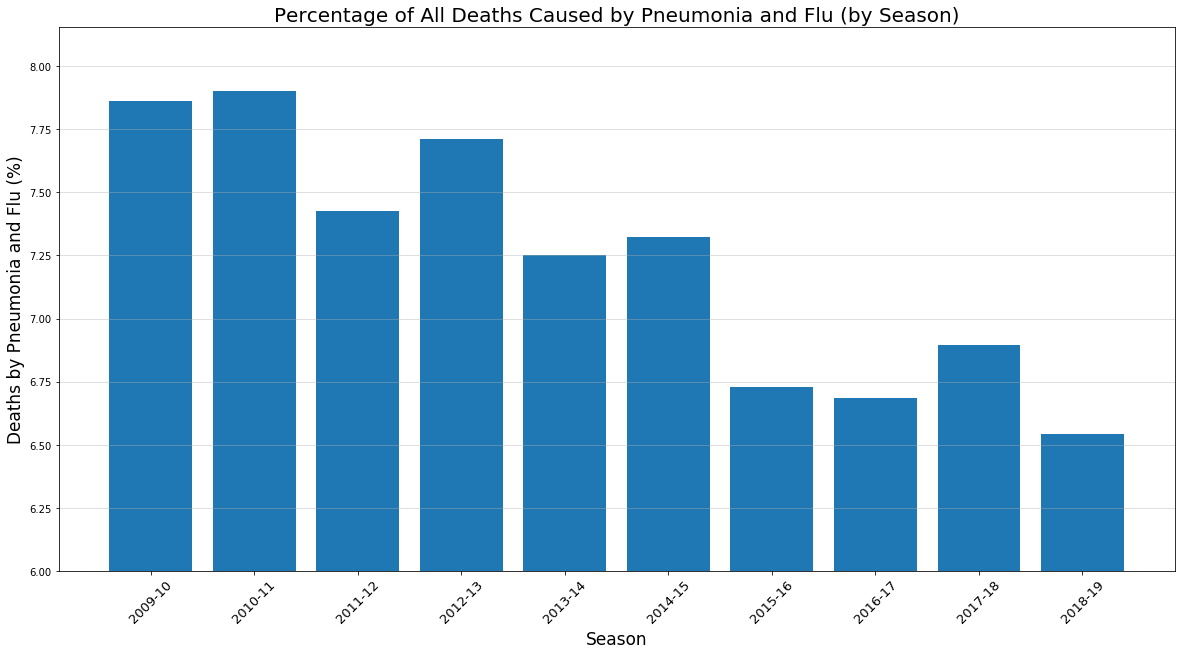

In [7]:
x_axis = np.arange(len(clean_data))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(clean_data["season"], clean_data["Death by Pneumonia and Flu"])

plt.title("Percentage of All Deaths Caused by Pneumonia and Flu (by Season)", fontsize=20)
plt.ylabel("Deaths by Pneumonia and Flu (%)", fontsize=17)
plt.xlabel("Season", fontsize=17)
plt.grid(axis="y", alpha=0.5)
plt.xticks(tick_locations, clean_data["season"], rotation=45, fontsize=13)
plt.ylim(6, max(clean_data["Death by Pneumonia and Flu"]+0.25))
plt.savefig("../images/death_season.png")


plt.show()

### Which States Have the Highest Rate of Death by Pneumonia and Influenza?

In [8]:
# Group CDC Data By state to find the number of deaths from Pneumonia and Influenza per state
cdcdata = cdc_data.groupby("State").sum()
cdc_data = pd.DataFrame(cdcdata)

# Merge Census Data with CDC Data (successfully) and remove any rows missing data
merged = pd.merge(cdc_data, census_pd ,on ="State", how="left")
merged = merged.dropna()

# Calculate the rate of death from Pneumona and Influenza from the population of the state
merged["Death Rate"] = ((merged["Deaths from pneumonia and influenza"] / merged["Population"])*100)

# Display sample of new dataframe
merged.head()

#season.dtypes

,State,Deaths from pneumonia and influenza,All Deaths,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,Death Rate
0,Alabama,30967.0,481905.0,46472.0,4850771.0,38.7,41118.0,849699.0,0.638393
1,Alaska,2316.0,39055.0,76114.0,738565.0,33.9,3451.0,73380.0,0.313581
2,Arizona,31726.0,498929.0,53510.0,6809946.0,37.2,65604.0,1128046.0,0.465877
3,Arkansas,23007.0,292166.0,43813.0,2977944.0,37.9,23003.0,524211.0,0.772580
4,California,205529.0,2391194.0,67169.0,38982847.0,36.1,691906.0,5773408.0,0.527229


In [9]:
# census_pd.to_csv('census_pd.csv', index=False)
# season.to_csv('season.csv', index=False)
# census_pdcsv=pd.read_csv('census_pd.csv',encoding='utf-8')
# seasoncsv=pd.read_csv('season.csv',encoding='utf-8')
# mergedcsv = census_pdcsv.merge(seasoncsv, on='State', how="left")
# mergedcsv=mergedcsv.dropna()
# mergedcsv

In [10]:
# Sort data by Death Rate for bar graph
merge_sort = merged.sort_values(by='Death Rate', ascending=False)
merge_sort

,State,Deaths from pneumonia and influenza,All Deaths,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,Death Rate
49,West Virginia,17821.0,209753.0,44061.0,1836843.0,42.2,10439.0,317089.0,0.970197
17,Kentucky,36669.0,428047.0,46535.0,4424376.0,38.6,32245.0,783586.0,0.828795
37,Oklahoma,30323.0,365516.0,49767.0,3896251.0,36.3,25161.0,612714.0,0.778261
3,Arkansas,23007.0,292166.0,43813.0,2977944.0,37.9,23003.0,524211.0,0.772580
42,South Dakota,6590.0,71523.0,54126.0,855444.0,36.8,3592.0,114885.0,0.770360
43,Tennessee,49642.0,615865.0,48708.0,6597381.0,38.6,49807.0,1072360.0,0.752450
40,Rhode Island,7936.0,92574.0,61043.0,1056138.0,39.9,10845.0,136126.0,0.751417
11,Hawaii,10427.0,100747.0,74923.0,1421658.0,38.8,10445.0,143148.0,0.733439
19,Maine,9513.0,130372.0,53024.0,1330158.0,44.3,5211.0,166904.0,0.715178
46,Vermont,4378.0,53064.0,57808.0,624636.0,42.8,2523.0,68144.0,0.700888


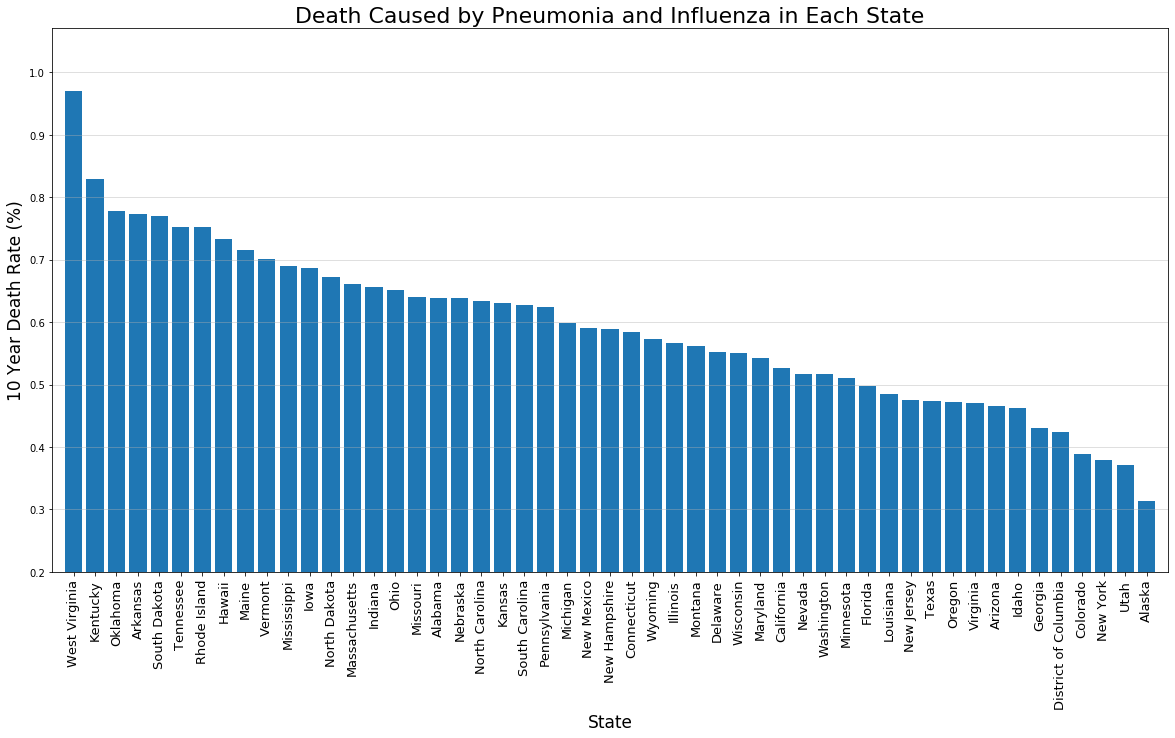

In [11]:
# Generate the Plot Death Rate vs States
x_axis = np.arange(len(merge_sort))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(merge_sort["State"], merge_sort["Death Rate"])

plt.title("Death Caused by Pneumonia and Influenza in Each State", fontsize=22)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("State", fontsize=17)
plt.grid(axis="y", alpha=0.5)
plt.xticks(tick_locations, merge_sort["State"], rotation="vertical", fontsize=13)
plt.xlim(-1, len(x_axis))
plt.ylim(0.2, max(merge_sort["Death Rate"])+0.1)
plt.savefig("../images/deathbystate.png")


plt.show()

### Potential Correlations between Death Rate and Census Data?

In [12]:
# Calculate Rates of poverty and education level from Census Data
merged["% People in Poverty"] = 100*merged["People in Poverty"]/merged["Population"]
merged["% People with no Degree"] = 100*merged[">25 with No Degree"]/merged["Population"]
merged.head()

,State,Deaths from pneumonia and influenza,All Deaths,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,Death Rate,% People in Poverty,% People with no Degree
0,Alabama,30967.0,481905.0,46472.0,4850771.0,38.7,41118.0,849699.0,0.638393,17.516782,0.847659
1,Alaska,2316.0,39055.0,76114.0,738565.0,33.9,3451.0,73380.0,0.313581,9.935483,0.467257
2,Arizona,31726.0,498929.0,53510.0,6809946.0,37.2,65604.0,1128046.0,0.465877,16.564683,0.963356
3,Arkansas,23007.0,292166.0,43813.0,2977944.0,37.9,23003.0,524211.0,0.772580,17.603118,0.772446
4,California,205529.0,2391194.0,67169.0,38982847.0,36.1,691906.0,5773408.0,0.527229,14.810124,1.774899


#### Death Rate vs Population

The rsquared = -0.2685214637431778


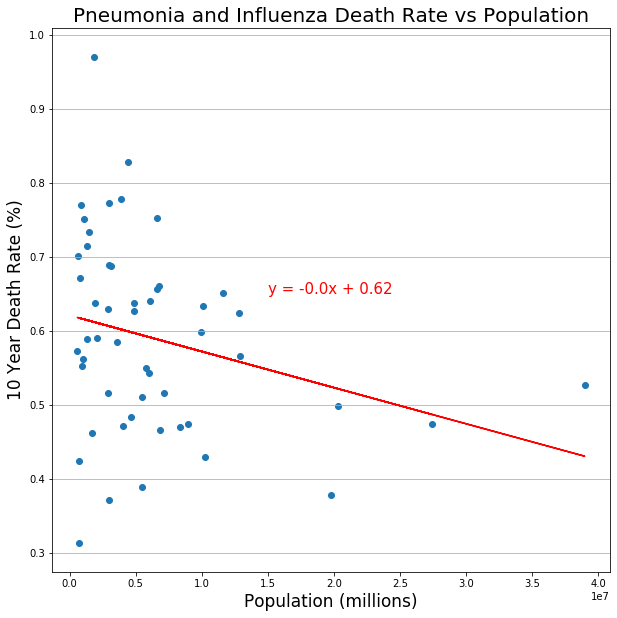

In [13]:
# Create Scatter Plot and generate regression line
x_values=merged["Population"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000000,0.65),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Population", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Population (millions)", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/population.png")


plt.show()

#### Death Rate vs Median Household Income

The rsquared = -0.4516697371501291


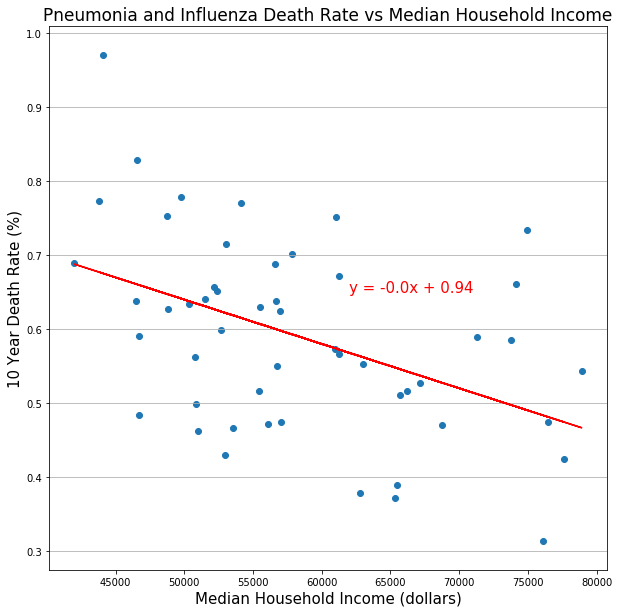

In [14]:
# Create Scatter Plot and generate regression line
x_values=merged["Median Household Income"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(62000,0.65),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Median Household Income", fontsize=17)
plt.ylabel("10 Year Death Rate (%)", fontsize=15)
plt.xlabel("Median Household Income (dollars)", fontsize=15)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/HHIncome.png")

plt.show()

#### Death Rate vs Median Age

The rsquared = 0.44554512721202155


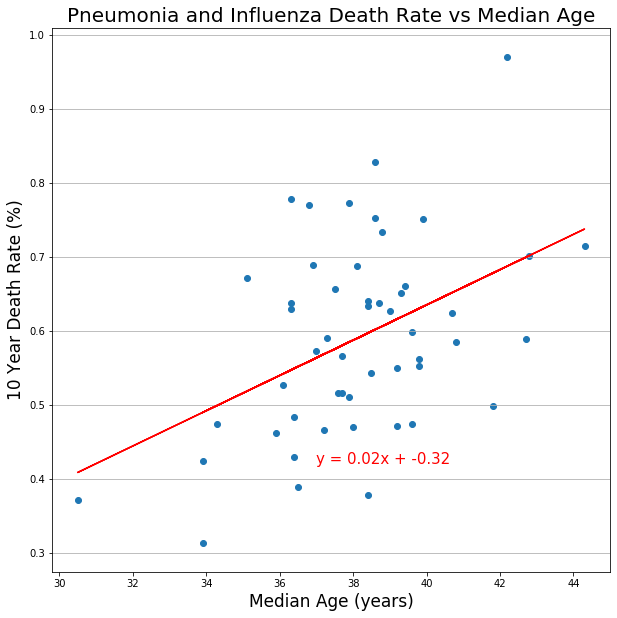

In [15]:
# Create Scatter Plot and generate regression line
x_values=merged["Median Age"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(37,0.42),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Median Age", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Median Age (years)", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/AGE.png")


plt.show()

#### Death Rate vs Education Level

The rsquared = -0.2529819446618038


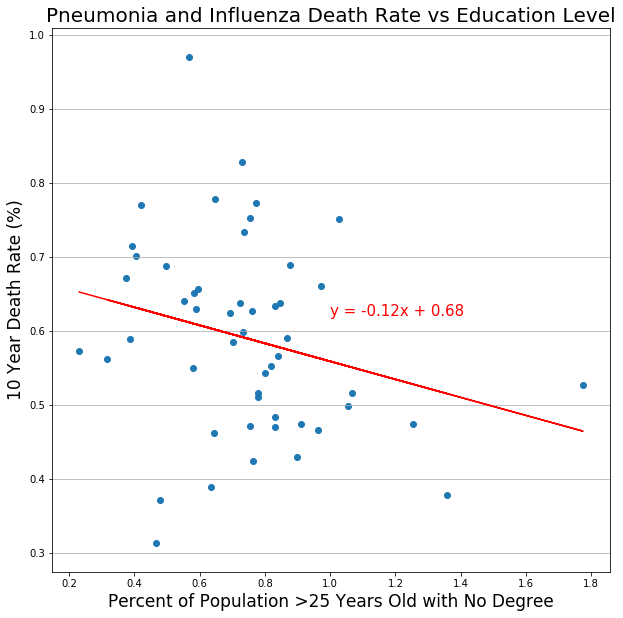

In [16]:
# Create Scatter Plot and generate regression line
x_values=merged["% People with no Degree"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,0.62),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Education Level", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Percent of Population >25 Years Old with No Degree", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/Education.png")


plt.show()

#### Death Rate vs Poverty Rate

The rsquared = 0.20918498571944194


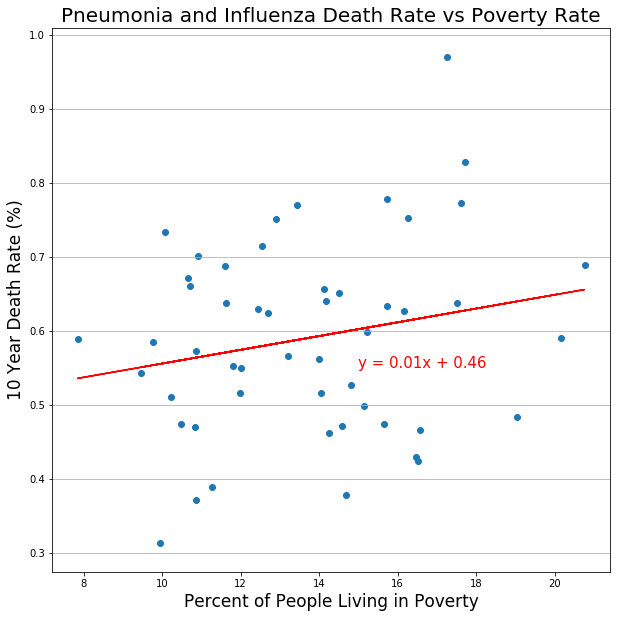

In [17]:
# Create Scatter Plot and generate regression line
x_values=merged["% People in Poverty"]
y_values=merged["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,0.55),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Poverty Rate", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Percent of People Living in Poverty", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/povertyrate.png")


plt.show()

### Potential Correlations between Death Rate and Weather Data?

In [18]:
# Import average temperature data and isolate the desired date ranges
avgtemps = pd.read_csv('avgtemps.csv')
avgtemps = avgtemps.loc[avgtemps['Date'] > 200909]

# Remove unneeded columns and group by state ('Location') to find average temperature 
avgtemps = avgtemps.drop(columns=(['Location ID', 'Rank', '1901-2000 Mean', 'Anomaly (1901-2000 base period)']))
avgtempsgrp = avgtemps.groupby('Location').mean()
avgtempsgrp

# Convert new dataset into a dataframe and merge with exsisting dataframe
avgtemps = pd.DataFrame(avgtempsgrp)
avgtemps = avgtemps.reset_index()
avgtemps = avgtemps.rename(columns={'Location': 'State', 'Value': 'Average Temperature'})
alldata = pd.merge(merged, avgtemps, on='State')
alldata.head()

,State,Deaths from pneumonia and influenza,All Deaths,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,Death Rate,% People in Poverty,% People with no Degree,Date,Average Temperature
0,Alabama,30967.0,481905.0,46472.0,4850771.0,38.7,41118.0,849699.0,0.638393,17.516782,0.847659,201443.195122,63.836585
1,Arizona,31726.0,498929.0,53510.0,6809946.0,37.2,65604.0,1128046.0,0.465877,16.564683,0.963356,201443.195122,61.234146
2,Arkansas,23007.0,292166.0,43813.0,2977944.0,37.9,23003.0,524211.0,0.772580,17.603118,0.772446,201443.195122,61.117886
3,California,205529.0,2391194.0,67169.0,38982847.0,36.1,691906.0,5773408.0,0.527229,14.810124,1.774899,201443.195122,59.291057
4,Colorado,21154.0,333505.0,65458.0,5436519.0,36.5,34489.0,612143.0,0.389109,11.259834,0.634395,201443.195122,46.280488


#### Death Rate vs Average Temperature

The rsquared = -0.004086606877742996


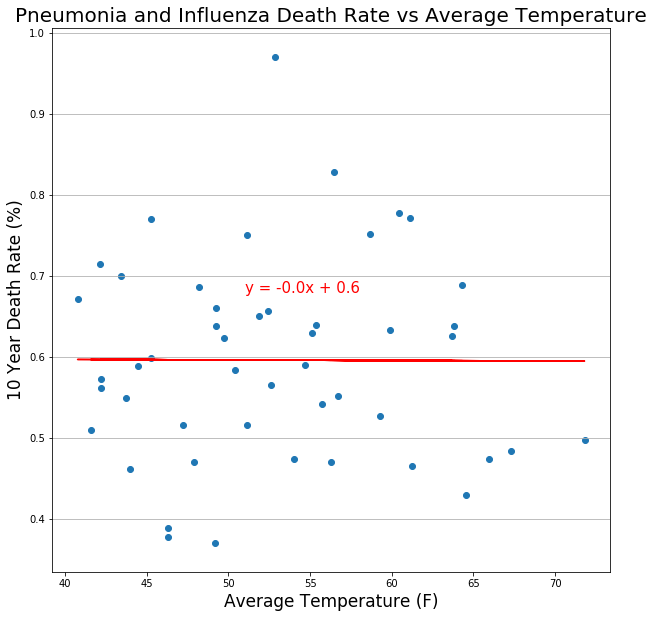

In [19]:
# Create Scatter Plot and generate regression line
x_values=alldata["Average Temperature"]
y_values=alldata["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(51,0.68),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Average Temperature", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Average Temperature (F)", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/temperature.png")


plt.show()

### Potential Correlations between Death Rate and Vaccination Data?

In [20]:
# Import data with correct encoding (thank you google)
vaxrate = pd.read_csv('fluvacc.csv', encoding='latin1')

# Extract Vaccination rates for each season for the desired patient population (> 6 months)
vaxrate = vaxrate.loc[:,["Names","2010-11","2011-12","2012-13","2013-14","2014-15","2015-16","2016-17","2017-18","2018-19"]]
vaxrate = vaxrate.rename(columns ={"Names" : "State"})

# Remove null values and ensure that all data is float
vaxrate = vaxrate.replace('NR', 0)
vaxrate[['2010-11', '2011-12', '2012-13', '2013-14' ,'2014-15', '2015-16', '2016-17', '2017-18', '2018-19']] = vaxrate[['2010-11', '2011-12', '2012-13', '2013-14' ,'2014-15', '2015-16', '2016-17', '2017-18', '2018-19']].astype(float)

# Calculate the average rate of vaccination for each state
vaxrate["AvgVaxRate"] = vaxrate.mean(axis=1)

# Display sample of dataframe
vaxrate.head()

,State,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,AvgVaxRate
0,Alabama,42.4,41.6,45.7,48.3,45.8,43.9,43.9,42.4,48.3,44.700000
1,Alaska,37.0,34.7,39.7,41.7,44.0,37.9,39.1,40.2,44.1,39.822222
2,Arizona,41.9,38.2,38.3,38.5,41.6,41.5,41.8,38.9,45.6,40.700000
3,Arkansas,44.2,46.6,47.0,49.7,50.5,45.4,46.2,41.7,48.8,46.677778
4,California,38.9,40.5,44.2,0.0,44.2,43.7,48.0,40.0,47.4,38.544444


In [21]:
# Compare seasons (death rate and vaccination rate)

# Remove "regions" from the vaxrate dataframe
other = merge_sort.loc[:,["State","Median Age"]]
vaxratetranspose = other.merge(vaxrate,how='left')
vaxratetranspose = vaxratetranspose.fillna(0)
vaxratetranspose = vaxratetranspose.replace('NR', 0)
vaxratetranspose = vaxratetranspose.set_index("State")
vaxratetranspose = vaxratetranspose.drop(columns=['Median Age','AvgVaxRate'])
vaxratetranspose = pd.DataFrame(vaxratetranspose)
averagest = vaxratetranspose.mean(axis=0)

# Find average vaccination rate for each season
averagest = pd.DataFrame(averagest)
averagest = averagest.reset_index()
averagest = averagest.rename(columns={0:'Average Vax Rate (Season)', 'index': 'season'})
averagest

# Transpose dataframe to create a season column
vaxratetranspose = vaxratetranspose.T
vaxratetranspose = vaxratetranspose.reset_index()
vaxratetranspose= vaxratetranspose.rename(columns={'index': 'season'})

# Merge Average Vaccination rate with death rates
vaxratetranspose = vaxratetranspose.merge(averagest, how='left')
vaxratetranspose = vaxratetranspose.loc[:,["season","Average Vax Rate (Season)"]]
seasoncompare = vaxratetranspose.merge(clean_data, how='inner')
seasoncompare = seasoncompare.loc[:,["season","Average Vax Rate (Season)", "Death by Pneumonia and Flu"]]
seasoncompare


,season,Average Vax Rate (Season),Death by Pneumonia and Flu
0,2010-11,44.478431,7.902855
1,2011-12,43.019608,7.425523
2,2012-13,46.162745,7.712461
3,2013-14,44.913725,7.251580
4,2014-15,48.256863,7.321373
5,2015-16,46.305882,6.729733
6,2016-17,46.645098,6.685920
7,2017-18,42.023529,6.896637
8,2018-19,47.552941,6.544050


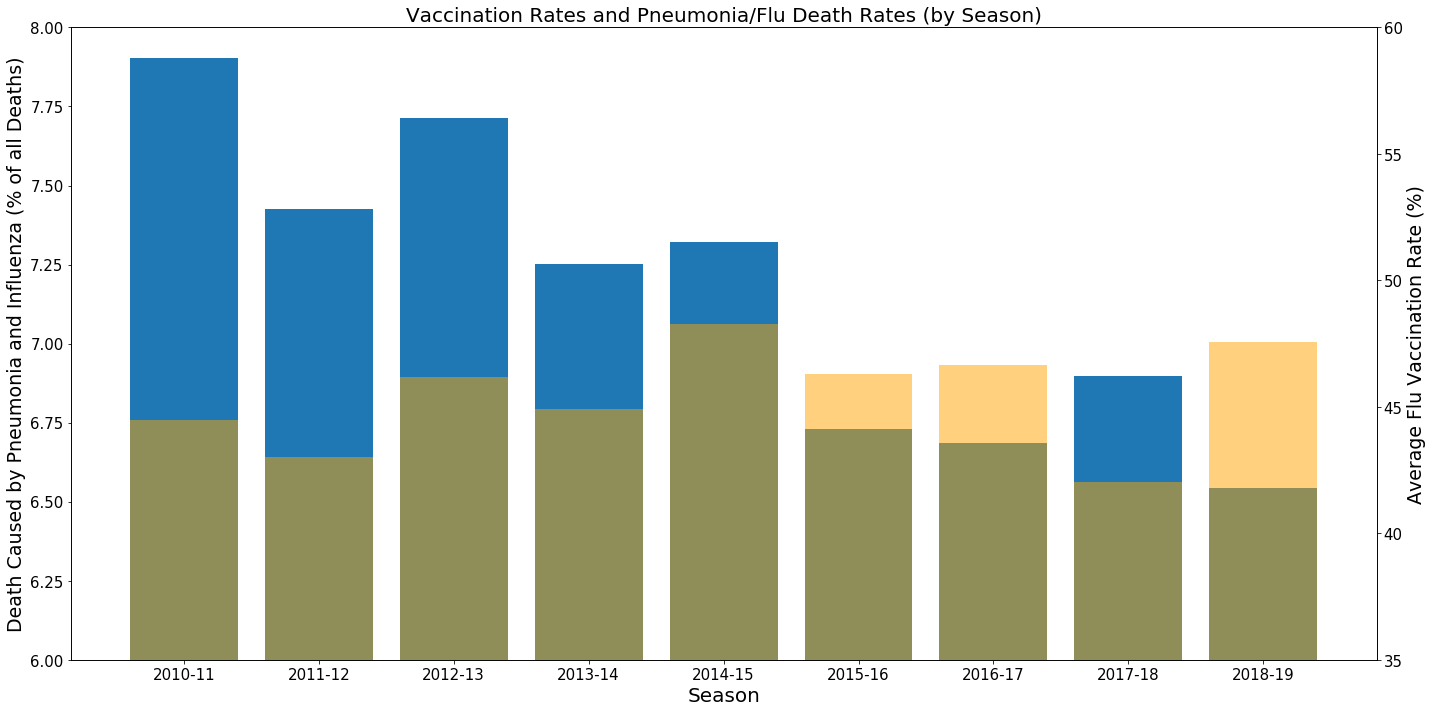

In [23]:
# Adapted from  ==>  https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots(figsize=(20,10))

x_axis = np.arange(len(seasoncompare))
tick_locations = [value for value in x_axis]


ax1.set_title("Vaccination Rates and Pneumonia/Flu Death Rates (by Season)", fontsize=20)
#color = 'tab:red'
ax1.set_xlabel('Season', fontsize=20)
ax1.set_ylabel('Death Caused by Pneumonia and Influenza (% of all Deaths)', fontsize=19)
ax1.bar(seasoncompare["season"], seasoncompare["Death by Pneumonia and Flu"], label='Death Rate')
ax1.set_ylim(6,8)
ax1.tick_params(labelsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('Average Flu Vaccination Rate (%)', fontsize=19)  # we already handled the x-label with ax1
ax2.bar(seasoncompare["season"], seasoncompare["Average Vax Rate (Season)"], color='orange', alpha=0.5, label='Vaccination Rate')
ax2.set_ylim(35,60)
ax2.tick_params(labelsize=15)


fig.tight_layout() 

plt.savefig("../images/death_season3.png")
plt.show()

In [24]:
# Remove unneeded columns to prepare data for merge
vaxrate = vaxrate.loc[:,["State","AvgVaxRate"]]
vaxrate.head()

,State,AvgVaxRate
0,Alabama,44.700000
1,Alaska,39.822222
2,Arizona,40.700000
3,Arkansas,46.677778
4,California,38.544444


In [25]:
# Merge new vaccination rate data with the exsisting dataframe and remove any rows with missing data
alldata = alldata.merge(vaxrate, on='State', how="left")
alldata=alldata.dropna()
alldata.head()

,State,Deaths from pneumonia and influenza,All Deaths,Median Household Income,Population,Median Age,>25 with No Degree,People in Poverty,Death Rate,% People in Poverty,% People with no Degree,Date,Average Temperature,AvgVaxRate
0,Alabama,30967.0,481905.0,46472.0,4850771.0,38.7,41118.0,849699.0,0.638393,17.516782,0.847659,201443.195122,63.836585,44.700000
1,Arizona,31726.0,498929.0,53510.0,6809946.0,37.2,65604.0,1128046.0,0.465877,16.564683,0.963356,201443.195122,61.234146,40.700000
2,Arkansas,23007.0,292166.0,43813.0,2977944.0,37.9,23003.0,524211.0,0.772580,17.603118,0.772446,201443.195122,61.117886,46.677778
3,California,205529.0,2391194.0,67169.0,38982847.0,36.1,691906.0,5773408.0,0.527229,14.810124,1.774899,201443.195122,59.291057,38.544444
4,Colorado,21154.0,333505.0,65458.0,5436519.0,36.5,34489.0,612143.0,0.389109,11.259834,0.634395,201443.195122,46.280488,48.266667


#### Death Rate vs Vaccination Rate

The rsquared = 0.38912465302768984


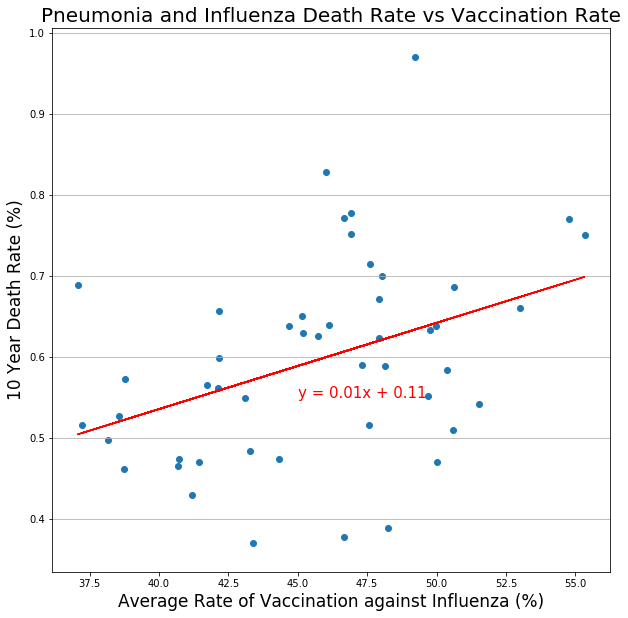

In [26]:
x_values=alldata["AvgVaxRate"]
y_values=alldata["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,0.55),fontsize=15,color="red")
plt.title("Pneumonia and Influenza Death Rate vs Vaccination Rate", fontsize=20)
plt.ylabel("10 Year Death Rate (%)", fontsize=17)
plt.xlabel("Average Rate of Vaccination against Influenza (%)", fontsize=17)
plt.grid(axis="y")
print(f"The rsquared = {rvalue}")
plt.savefig("../images/vaxrate.png")


plt.show()

### Search by State

In [27]:
# Create df with all states and all previously merged data
merge_sort = pd.merge(merge_sort, avgtemps, on='State', how='left')
merge_sort = pd.merge(merge_sort, vaxrate, on='State', how='left')
merge_sort["% People in Poverty"] = 100*merge_sort["People in Poverty"]/merge_sort["Population"]
merge_sort["% People with no Degree"] = 100*merge_sort[">25 with No Degree"]/merge_sort["Population"]

Which State would you like to search? Kentucky
----------------------------------
Population: 4424376 (rank 26)
Median Household Income $46535 (rank 47)
Poverty Rate: 17.71% (rank 4)
Median Age: 38.6 (rank 21)
Average Vaccination Rate: 46.02% (rank 27)
----------------------------------
10 Year Death Rate: 0.829% (rank 2)
----------------------------------
Grim Reaper completed a Data Analytics Bootcamp in your state
----------------------------------


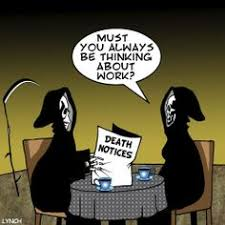

In [33]:
searchdf = merge_sort.set_index('State')

try:
    mystate = input("Which State would you like to search? ")

    print("----------------------------------")


    GRBad = ["Grim Reaper has a summer home in your state", "Grim Reaper has family in your state", 
             "Grim Reaper knows all the best restaurants in your state", 
             "Grim Reaper completed a Data Analytics Bootcamp in your state", 
             "Grim Reaper wonders if your state is interested in the corona virus also"
            ]
    GRGood = ["Grim Reaper finds your state boring", "Grim Reaper doesn't care for the weather in your state", 
              "Grim Reaper is not allowed back in your state", 
              "Grim Reaper has been politely asked to not return to your state", 
              "Grim Reaper got lost and can't make it to your state", 
              "Grim Reaper already had plans that weekend and couldn't make it to your state", 
              "Grim Reaper flaked out at the last minute and went to a different state", 
              "Grim Reaper heard about an awesome party in West Virginia and couldn't make it to your state", 
              "Grim Reaper was arrested for carrying an unlisenced sickle and couldn't make it to your state",
              "Grim Reaper was disappointed that people wash their hands so much in your state", 
              "Grim Reaper is taking a sick day and can't come to your state"
              ]

    mypopulation = searchdf.loc[mystate.title(), "Population"]
    searchdf['rank'] = searchdf["Population"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'Population: {int(mypopulation)} (rank {int(rank)})')
    #print(rank)

    myincome = searchdf.loc[mystate.title(), "Median Household Income"]
    searchdf['rank'] = searchdf["Median Household Income"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'Median Household Income ${int(myincome)} (rank {int(rank)})')

    mypoverty = searchdf.loc[mystate.title(), "% People in Poverty"].round(2)
    searchdf['rank'] = searchdf["% People in Poverty"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'Poverty Rate: {mypoverty}% (rank {int(rank)})')


    mydegree = searchdf.loc[mystate.title(), "% People with no Degree"]
    mytotaldeath = searchdf.loc[mystate.title(), "All Deaths"]
    myillnessdeath = searchdf.loc[mystate.title(), "Deaths from pneumonia and influenza"]
    mytemps = searchdf.loc[mystate.title(), "Average Temperature"]


    myage = searchdf.loc[mystate.title(), "Median Age"]
    searchdf['rank'] = searchdf["Median Age"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'Median Age: {myage} (rank {int(rank)})')


    


    myvaxrate = searchdf.loc[mystate.title(), "AvgVaxRate"].round(2)
    searchdf['rank'] = searchdf["AvgVaxRate"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'Average Vaccination Rate: {myvaxrate}% (rank {int(rank)})')

    print("----------------------------------")


    mydeathrate = searchdf.loc[mystate.title(), "Death Rate"].round(3)
    searchdf['rank'] = searchdf["Death Rate"].rank(method='max', ascending=False)
    rank = searchdf.loc[mystate.title(), "rank"]
    print(f'10 Year Death Rate: {mydeathrate}% (rank {int(rank)})')

    if rank < 11:
        badlist = []
        index=0
        for x in (GRBad):
            badlist.append(index)
            index= index +1
        r = random.choice(badlist)
        print("----------------------------------")
        print(GRBad[r])
        print("----------------------------------")
        imagelist = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg']
        i = random.choice(imagelist)
        display(Image(filename=f'images/{i}'))
    else:
        goodlist = []
        index=0
        for x in (GRGood):
            goodlist.append(index)
            index= index +1
        n = random.choice(goodlist)
        print("----------------------------------")
        print(GRGood[n])
        print("----------------------------------")
        imagelist = ['good1.jpg','good2.jpg','good3.jpg','good4.jpg','good5.jpg','good6.jpg','good7.jpg']
        i = random.choice(imagelist)
        display(Image(filename=f'images/{i}'))
except:
    print("Maybe spell better...")


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
